<a href="https://colab.research.google.com/github/ReImage-CollegeProject/Learn_PyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Resources:
* Book : https://www.learnpytorch.io/01_pytorch_workflow/

In [49]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inferences)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [17]:
import torch
from torch import nn    # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt


## check PyTorch version
torch.__version__


'2.1.0+cu121'

## 1. Data (Preparing and Loading)

data can be almost anything .. in machin leanring
* Excel spreadsheet
* images of any kind
* videos (YouTube has lots of data..)
* audio like songs or podcasts
* DNA
* text

Machine leaning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representaion

To showcase this, let's create some known data using Linear regression data

We'll use linear regression formula to make a straight line with known **parameters**.

In [51]:
 # create known parameter
 weight = 0.7
 bias = 0.3

 # create
 start = 0
 end = 1
 step = 0.02
 X = torch.arange(start,end,step).unsqueeze(dim=1) # tensor
 y = weight  * X + bias

 X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [52]:
len(X), len(y)

(50, 50)

### 2. Splitting data into training and test sets (one of the most important concepts in Machine learning in general)

* Training set   - (60 - 80%)
* Validation set - (10 - 20%)
* Testing set    - (10 - 20%)

Let's create a training and test set with our data.


In [53]:

#  create a train/test split data from given dataset

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# we can create train split using `scikit learn` train test split
## search `scikit learn train test split`


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [54]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

how to better visualize our data?

this is where the data explorer's moto comes in !!!

"Visualize, visualize, visualize"

In [22]:
# import the matplotlib library
import matplotlib.pyplot as plt


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares the predictions:
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="#02d1a8", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  #show legend
  plt.legend(prop={"size": 14})

In [23]:
plot_predictions()

AttributeError: ignored

## Build Model

### Creating our first PyTorch model for linear regression



What our model does:
* start with random values (weight & bias)
* look at training data and adjus the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)


How to do so?

through two main algorithms:
1. Gradient descent
2. backpropagation

In [57]:
## y = mx + c
## y = ax + b

from torch import nn
import torch

# Create linear regresson model class
# `nn.Module` contains all the building blocks of the neural network
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherihts fom nn.Moudle
  def __init__(self):
    super().__init__()

    # Initialize the model parameters
    """ initialize the *model parameters to be used in various computaitons (these could be different layers from torch.nn,
    single parameter, hard-coded values or functions* """
    self.weights = nn.Parameter(torch.randn(1,    # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,   # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float))   # <- PyTorch lovest the datatype torch.float32
    """ `requires_grad=True` means PyTorch will track the gradients of this specific parameter for use
    with `torch.autograd` and gradient descent (for many `torch.nn` moduels, `requires_grad=True` is set by default)  """

    self.bias = nn.Parameter(torch.randn(1,       # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True,  # <- can this parameter be updated via gradient descent ?
                                         dtype=torch.float))  # <- PyTorch loves the datatype torch.float32

  # Forward metho to define the computation in the model
  """Any subclass of the `nn.Module` needs to override forward()
  (this defines the forward computation of the model)"""
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias     # this is the linear regression formula y = mx + b

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computation graphs (a neural network can be considered as computational graph)
* `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - base class for all the neural network modules, if you subclass it, you should override `forward()` method
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All the `nn.Module` subclasses require you to override the `forward()` method, this method define what happens in the forward computation  
* `torch.utils.data.Dataset` - Represent a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels.
* `torch.utils.data.DataLoader` - Creates a Python iterable overa a torch Dataset (allows you to iterate over your data)




Resources:
 - PyTorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created the model let's see what's inside

So we can checkout our model parameters or what's inside our model using `.parameters()`.

In [58]:
## create a random seed

RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

# Create an instace of the model (this is a subclcass of `nn.Module`)
model_0 = LinearRegressionModel()


# Checkout the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [59]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
weight, bias

(0.7, 0.3)

### making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's  going to run it through the `forward()` method

In [61]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [62]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [63]:
# Make predictions with model
### inference mode disables all of the gradient which is needed while training our model
with torch.inference_mode():
  y_preds = model_0(X_test)

# something similar can be done using `torch.no_grad()`, however `torch.inference_mode()` is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Inference mode learning : https://x.com/PyTorch/status/1437838231505096708?s=20

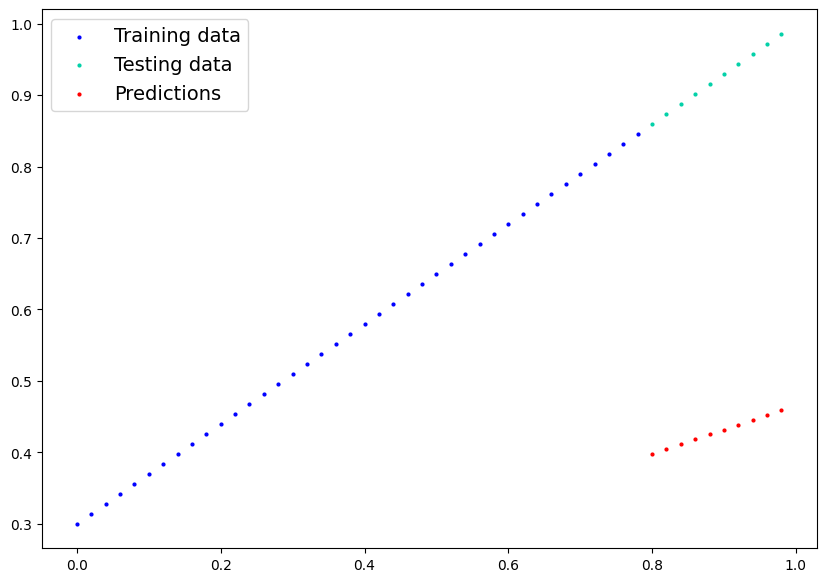

In [64]:
plot_predictions(predictions=y_preds)

####  Transfer learning



<br>
<br>
<br>
<br>
<br>

another approach
>  start the parameter with unknown random values and then adjust the value accordingly

## 3. **Train model**

The whole idea of training is for a model to move from *unknown* parameters (these may be random) to some *known* parameters.

In other words, from a poor representation of the data to a better representation of the data.


One way to how poor or how wrong your model predictions are is to use loss function or cost function

* **NOTE** : Loss function may also be called `cost function` and `criterion` in different areas. For our case we are going to refer it as a loss function - https://pytorch.org/docs/stable/optim.html



---

### 3.1 **Pick a loss function and optimizer**

Things we are going to need to train our model:

* **Loss Function** : A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer** : Take into account the loss of a model and adjusts the model's paramters (e.g. weight & bias in our case ) to improve the loss function

  * Inside the optimizer you will often have to setup two parameters:
    * `params`: the model parameters you'd like to optimize, for example: `params=model_0.parameters()`
    * `lr` (learning rate): the learning rate is the hyperparameter that decides how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

<br>

And specifically for PyTorch we need :
* A training loop
* A testinng loop

In [65]:
## to check those parameters we can use
# list(model_0.parameters())



In [66]:
# Check out our model's parameters (a paramter is the value that the model sets itself)
## for named parameter we need to use
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [67]:
## Steup the loss function
loss_fn = nn.L1Loss()       # <- measurse the how wrong our model is

## Setup an optimizer
# optimizer <- adjusts the model parameter to reduce the loss
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)       # lr = learning rate (most important  hyperparameter that we can set)


**Q**: Which loss function and optimizer should I use ? <br>
**A**: The answer of this question is problem specific. <br>
  For example: for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice


But for a classification problem like classifying whether a photo is of a cat or a dog, loss functions of `nn.BCELoss()`(binary cross entropy loss) is likely to be used.

---

### 3.2 **Building a training loop (and a testing loop) in PyTorch**

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` methods ) to make predictions on data - also called `forward propagtion`
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimize the zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimize step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [68]:
list(model_0.eval().parameters())

with torch.no_grad():
  list(model_0.parameters())

In [69]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
# an epoch is one loop through the data... (this is a hyperparameter because we set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()     # train mode in PyTorch sets all the parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss (MAE)
  loss = loss_fn(y_pred,  y_train)
  # print(f"\tLoss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform the backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()    # by default how the optimizer changes will accumulate through loop so... we have to zero them above in step 3 for the next iteration of the loop


  # Testing
  model_0.eval()      # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():    # turns of the gradient tracking & a couple more things behind the scenes
  # with torch.no_grad():       # <- this is seen in the older version of code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  # prints out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss: {test_loss}")
    # Print out model state_dict()
    print(f"\t parameters: {model_0.state_dict()}")
    print("\n")



Epoch : 0 | Loss : 0.31288138031959534 | Test Loss: 0.48106518387794495
	 parameters: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


Epoch : 10 | Loss : 0.1976713240146637 | Test Loss: 0.3463551998138428
	 parameters: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])


Epoch : 20 | Loss : 0.08908725529909134 | Test Loss: 0.21729660034179688
	 parameters: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])


Epoch : 30 | Loss : 0.053148526698350906 | Test Loss: 0.14464017748832703
	 parameters: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])


Epoch : 40 | Loss : 0.04543796554207802 | Test Loss: 0.11360953003168106
	 parameters: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])


Epoch : 50 | Loss : 0.04167863354086876 | Test Loss: 0.09919948130846024
	 parameters: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])


Epoch : 60 | Loss : 0.03818932

In [71]:
# epoch_count, loss_values, test_loss_values

In [72]:
# import numpy as np
# np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

In [73]:
# import numpy as np
# torch.tensor(loss_values).detach(), test_loss_values


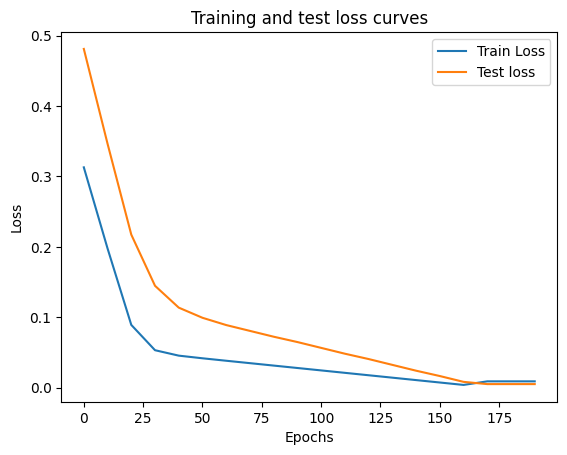

In [74]:
# Plot the loss curves

plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")   # <- here manual conversion to numpy is required because the value of the list contians `grad_fn`
plt.plot(epoch_count, test_loss_values, label="Test loss" )
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [75]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


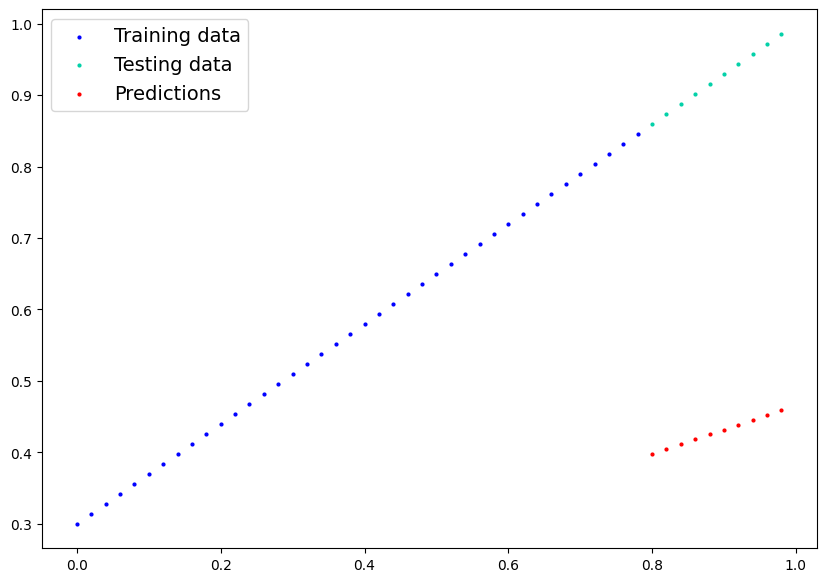

In [76]:
plot_predictions(predictions=y_preds)

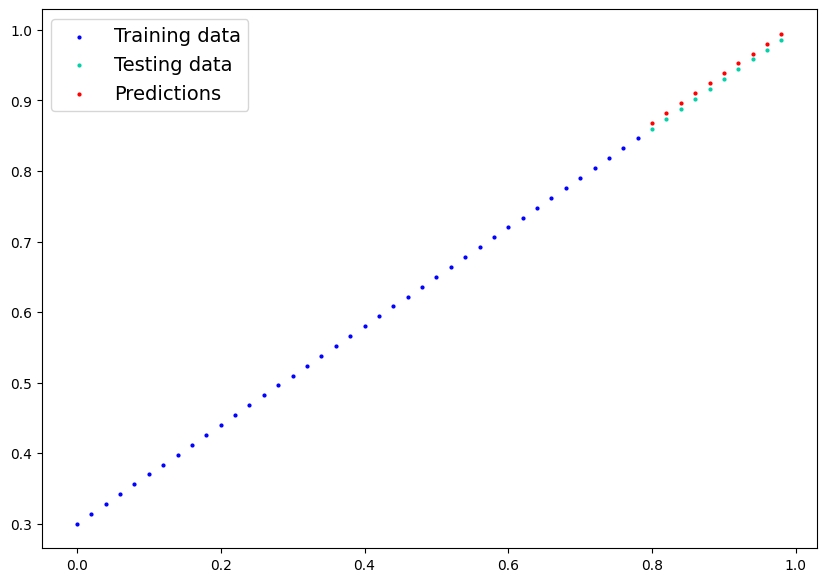

In [77]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch


There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows your to load a saved PyTorch object
3. `toch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary



PyTorch save & Load code tutorial + extra-curricular https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [78]:
# saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create a model save path
MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH



# 2. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_python_workflow_model_0.pth


In [79]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1674 Dec 20 15:32 01_python_workflow_model_0.pth


In [80]:
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])


Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `state_dict` into newly created instance

In [81]:
# to load a saved state_dict() we have to instantiate a new instace of our model class
loaded_model_0 = LinearRegressionModel()


# Load the saved staite_dict of the model_0 (this will update new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [82]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [83]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [84]:
# Make some prediction with our loaded model to make sure it is the correct one
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [85]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [86]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it together

Let's go back through the steps above and see it all in one place.

In [37]:
# Import PyTorch and Matplotlib
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# check the PyTorch version

Create a device-agnostic code  

This means if we got access to GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [36]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [89]:
!nvidia-smi         # to check the specs of the provided GPU

Wed Dec 20 15:32:37 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data



In [10]:
# Create some data using the Linear regression formula of y =  weight * X + bias
weight = 0.7
bias = 0.3


# Create range values

start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start,end, step).unsqueeze(dim=1) # this will reduce the dimension of the data to 1 dimension
# without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

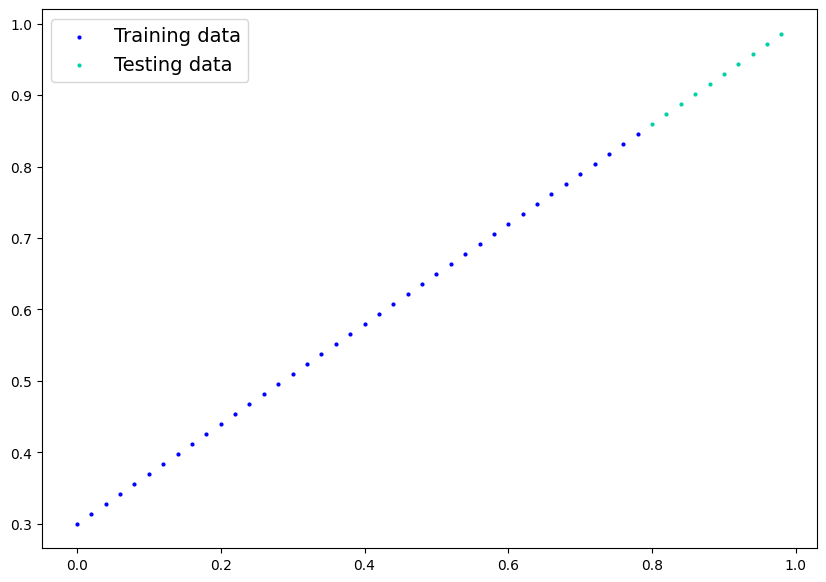

In [27]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model



In [34]:
# create a linear model by subclassing `nn.Module`
import torch
from torch import nn
import matplotlib.pyplot as plt

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    # often time you don't need to initialize the parameter yourself
    # you will instead initialize the layers that have the parameters in-built in those layer

    # Use `nn.Linear()` for creating the parameters for the Linear Model / alos called linear tranfor, probing layer, fully connected layer, dense layer
    # this means we take one feature of `X_train` to output the one feature of `y_train`
    self.linear_layer = nn.Linear(in_features=1,      # <- this means the we take input of size 1
                                 out_features=1)    # <- this means the output will if size 1


  """ input x should always be `torch.Tensor` and return type of the method will be
  `torch.Tensor` """
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()


(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [39]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [43]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [26]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

### 6.3 Training part

For training we need
* Loss function   - measures how wrong our model is
* Optimizer       - adjusts the parameter values so that there is lesser loss value
* Training loop
* Testing loop

In [46]:
# Setup the loss function
loss_fn = nn.L1Loss()     # same as MAE(Mean Absolute Error)


# Setup our optimizer
optimizer = torch.optim.SGD( params=model_1.parameters(), lr=0.01)   # Stochastic Gradient Descent


In [51]:
# Training loop

torch.manual_seed(42)

epochs = 200


# Put the data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)



for epoch in range(epochs):
  model_1.train()


  # 1. forward pass                   # <- this is where we calculate the predictions
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer
  optimizer.zero_grad()


  # 4. backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()      # <- for testing we set the model into evaluation model
       # this turn off things like Dropout, BatchNorm etc
  with torch.inference_mode():    # <- turn off things like autograd (which is used during model training )
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print's out what's happening

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss : {loss} | Test loss; {test_loss}")


Epoch: 0 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 10 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 20 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 30 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 40 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 50 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 60 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 70 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 80 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 90 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 100 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 110 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 120 | Loss : 0.0012645035749301314 | Test loss; 0.013801807537674904
Epoch: 130 | Loss : 0.0

In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [53]:
weight, bias

(0.7, 0.3)

In [56]:

type(y_preds)

torch.Tensor

### 6.4 Making and evaluating predictions

In [63]:
#  Turn the model into evaluation mode
model_1.eval()      # <- every time we are making prediction or inference we want our model to be in eval mode

# Make the prediction on the test data = it means drawing inference from the trained model
# by providing the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds




tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

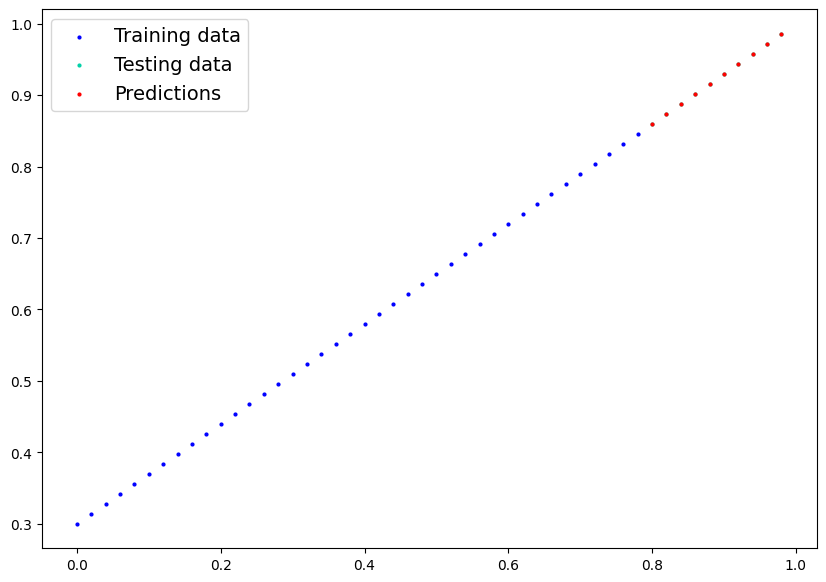

In [64]:
# check out our model predictions visually
plot_predictions(predictions=y_preds)

**NOTE**:

- every time when we want to train our model we turn the model into training mode using `model_0.train()`
- every time we want to test or plot the graph of the values of prediced model we want to turn the model into `eval` mode using `model_0.eval()`
- while drawing the conclusion or inference of the model we turn on the model into inference mode using `inference_mode()`


### 6.5 Saving & loadin a trained model


In [72]:
from pathlib import Path

# 1. Create directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. create a model save path
MODEL_NAME = "01-pytorch_test.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


# 3. Save the model state_dict()
print(f"Saving the state dict of model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the state dict of model to: model/01-pytorch_test.pth


In [73]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Load a PyTorch Model


In [75]:
# load pytorch model


## Create a new instace of linear regression model v2
loaded_model_1 = LinearRegressionModelv2()


# load the saved model_1 state_dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)



LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [77]:
next(loaded_model_1.parameters()).device


device(type='cpu')

In [80]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [82]:

# Evaluate the loaded model
loaded_model_1.eval()


with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])